In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
fsize = 12
plt.rcParams['axes.labelsize'] = fsize
plt.rcParams['axes.titlesize'] = fsize
plt.rcParams['xtick.labelsize'] = fsize
plt.rcParams['ytick.labelsize'] = fsize

In [2]:
def sinh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sinh_Lambda = np.diag(np.sinh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sinh_A = V @ sinh_Lambda @ V_inv
    
    return sinh_A

def cosh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    cosh_Lambda = np.diag(np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    cosh_A = V @ cosh_Lambda @ V_inv
    
    return cosh_A

#tanh of matrix A
def tanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    tanh_Lambda = np.diag(np.tanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    tanh_A = V @ tanh_Lambda @ V_inv
    
    return tanh_A

#sech of matrix A
def sech(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sech_Lambda = np.diag(1. / np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sech_A = V @ sech_Lambda @ V_inv
    
    return sech_A

def chi(n,t,T):
    return np.sinc(t/T-n)/np.sqrt(T)

In [3]:
#double gaussian joint amplitude
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)

def rnm_dg_unshifted(n,m,w1,w2):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4 + 1j*w1*n*np.sqrt(np.pi)*Tc + 1j*w2*m*np.sqrt(np.pi)*Tc)


def r_dg_f(num,k,f):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg(n/f,(m-k)/f))
        r.append(row)
        
    return np.array(r) / f

In [35]:
#previously there was an issue with V^CW when resolution increased because Emat was not also adjusted
def Emat(w, dim):
    Emat = [] 
    tau = np.sqrt(np.pi) * Tc / fine_param
    for n in range(dim):
        row = []
        for m in range(dim):
            row.append(np.exp( (0+1j) * w * (n-m) * tau))
        Emat.append(row)
    return Emat


def Lmat(w, t, dim):
    Lmat = [] 
    tau = np.sqrt(np.pi) * Tc
    for n in range(dim):
        row = []
        for m in range(dim):
            row.append(np.sqrt(tau) * np.exp((0+1j) * w * t) * np.exp( -(0+1j) * w * m * tau) * chi(n,t,tau))
        Lmat.append(row)
    return Lmat



#time dependent spectrum
def Vt(w,t,theta):
    dim = len(Q)
    E = Lmat(w, t, dim)
    sinh2Q = np.linalg.matrix_power(sinhQ,2)
    Matrix1 = np.matmul(E,sinh2Q) + np.matmul(np.transpose(E),sinh2Q)
    Matrix2 = np.exp(-2*(0+1j)*theta)*np.linalg.multi_dot([E,np.conjugate(sinhQ),np.conjugate(coshQ),np.conjugate(U)])
    Matrix3 = np.exp(2*(0+1j)*theta)*np.linalg.multi_dot([np.transpose(E),sinhQ,coshQ,U])
    return 1 + np.trace(Matrix1 + Matrix2 + Matrix3)


# spectrum V(omega)
def V(w,theta):
    dim = len(Q)
    E = Emat(w, dim)
    sinh2Q = np.linalg.matrix_power(sinhQ,2)
    Matrix1 = np.identity(dim) + np.matmul(E,sinh2Q) + np.matmul(np.transpose(E),sinh2Q)
    Matrix2 = np.exp(-2*(0+1j)*theta)*np.linalg.multi_dot([E,np.conjugate(sinhQ),np.conjugate(coshQ),np.conjugate(U)])
    Matrix3 = np.exp(2*(0+1j)*theta)*np.linalg.multi_dot([np.transpose(E),sinhQ,coshQ,U])
    return np.trace(Matrix1 + Matrix2 + Matrix3)

# spectrum V(omega) specifically at w=0
def V0(theta):
    dim = len(Q)
    sinh2Q = np.linalg.matrix_power(sinhQ,2)
    Matrix1 = np.identity(dim) + sinh2Q + sinh2Q
    Matrix2 = np.exp(-2*(0+1j)*theta)*np.linalg.multi_dot([np.conjugate(sinhQ),np.conjugate(coshQ),np.conjugate(U)])
    Matrix3 = np.exp(2*(0+1j)*theta)*np.linalg.multi_dot([sinhQ,coshQ,U])
    return np.trace(Matrix1 + Matrix2 + Matrix3)

def Sq0():
    return V0(np.pi/2)/len(Q)

def Vis(w):
    return (V(w,0) - V(w,np.pi/2)) / (V(w,0) + V(w,np.pi/2))

#measured squeezing ONLY WHEN U=I
def Sq(w):
    return V(w,np.pi/2)/len(Q)

#minimum variance in the pulsed discretized case
def Var(theta):
     return 1 + 2*np.linalg.multi_dot([f,N,f.conj().T]) + 2*np.real(np.exp(2*(0+1j)*theta)*np.linalg.multi_dot([f,M,f.T]))

#returns K given N and M
def Kmat(N,M):
    return np.block([[np.real(N)+np.real(M),np.imag(N)+np.imag(M)],[np.imag(M)-np.imag(N),np.real(N)-np.real(M)]])

In [5]:
#defining dg joint amplitude
Tc=0.001
Tp=1
Bc = 0.1
fine_param = 1
mat_size = 30 * fine_param

r = r_dg_f(mat_size,0,fine_param)

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


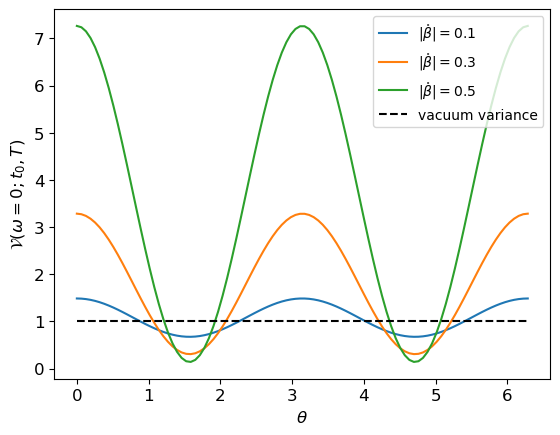

In [6]:
#plotting V(0) vs. theta at different Bc
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
w_val = 0
Bc_list = [0.1,0.3,0.5]
thetalist = np.linspace(0,2*np.pi,100)

for Bc in Bc_list:
    B = Bc * r
    U, Q = sc.linalg.polar(B, side = "left")
    sinhQ = sinh(Q)
    coshQ = cosh(Q)

    Vlist = []
    for theta in thetalist:
        Vlist.append(V(w_val,theta))
    plt.plot(thetalist,np.array(Vlist)/len(Q), label=r"$|\mathring{\beta}|=$"+str(Bc))

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\mathcal{V}(\omega=0;t_0,T)$")
plt.hlines(1, 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
plt.legend(loc="upper right")
plt.show()

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


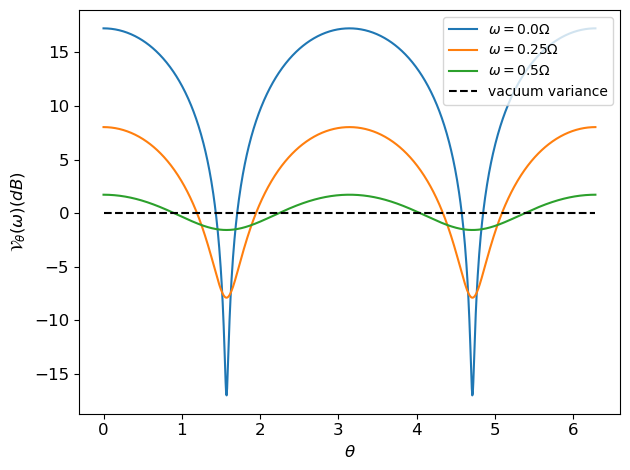

In [53]:
#plotting V(w) vs. theta at w
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
w_list = np.array([0, 0.5, 1])
thetalist = np.linspace(0,2*np.pi,1000)

B = Bc * r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ = sinh(Q)
coshQ = cosh(Q)

for w in w_list:
    Vlist = []
    for theta in thetalist:
        Vlist.append(V(w * Omega / 2,theta))
    plt.plot(thetalist,10*np.log10(np.array(Vlist)/len(Q)), label="$\omega=$"+str(w/2)+r"$\Omega$")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\mathcal{V}_\theta(\omega) (dB)$")
plt.hlines(0, 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Homo_CW.pdf")
plt.show()

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


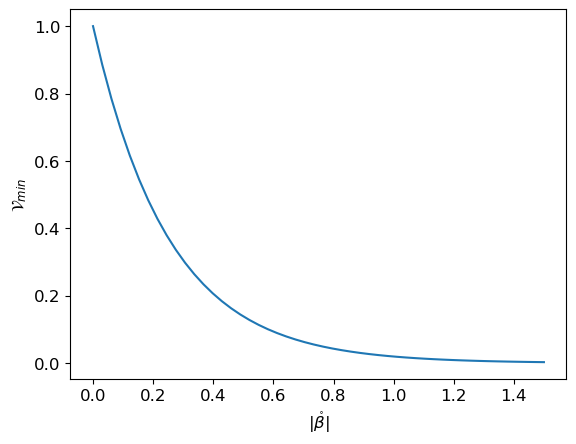

In [9]:
#plotting Sq at w=0 vs Bc

#range of w is set by Omega
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
Bc_vals = np.linspace(0,1.5,50)
Sq_list = []
for Bc in Bc_vals:
    B = Bc * r
    U, Q = sc.linalg.polar(B, side = "left")
    sinhQ = sinh(Q)
    coshQ = cosh(Q)

    Sq_list.append(Sq(0))

plt.plot(Bc_vals,Sq_list)
plt.ylabel(r"$\mathcal{V}_{min}$")
plt.xlabel(r"$|\mathring{\beta}|$")
plt.show()
    

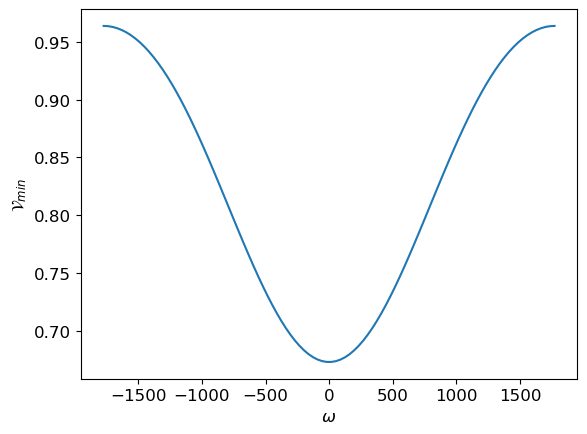

In [10]:
#plotting Sq vs w
Bc = 0.1

B = Bc * r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ = sinh(Q)
coshQ = cosh(Q)

#range of w is set by Omega
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
wlist = np.linspace(-Omega/2, Omega/2, 100)

Sq_list = []
for w in wlist:
    Sq_list.append(Sq(w))
    
plt.plot(wlist,Sq_list)
plt.ylabel(r"$\mathcal{V}_{min}$")
plt.xlabel(r"$\omega$")
plt.show()
    

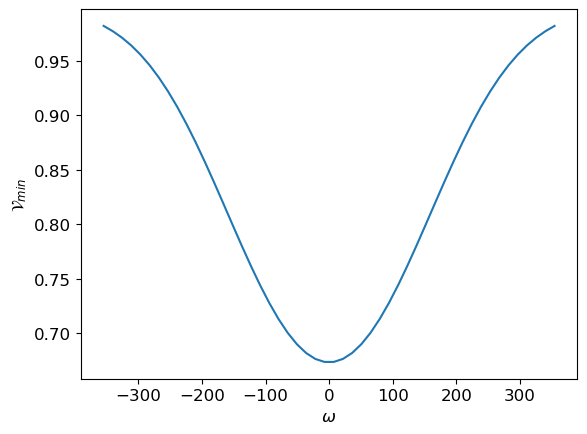

In [173]:
#defining dg joint amplitude
Tc=0.001
Tp=1
Bc = 0.1
fine_param = 5
mat_size = 30 * fine_param

r = r_dg_f(mat_size,0,fine_param)

#plotting Sq vs w
Bc = 0.1

B = Bc * r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ = sinh(Q)
coshQ = cosh(Q)

#range of w is set by Omega
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
wlist = np.linspace(-Omega/2, Omega/2, 50)

Sq_list = []
for w in wlist:
    Sq_list.append(Sq(w))
    
plt.plot(wlist,Sq_list)
plt.ylabel(r"$\mathcal{V}_{min}$")
plt.xlabel(r"$\omega$")
plt.show()

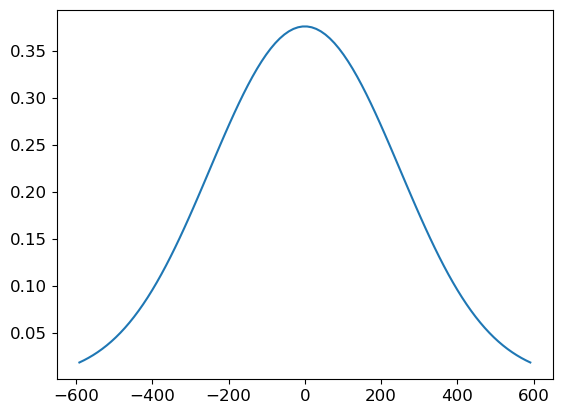

In [138]:
#defining dg joint amplitude
Tc=0.001
Tp=1
Bc = 0.1
fine_param = 3
mat_size = 30 * fine_param

B = Bc * r_dg_f(mat_size,0,fine_param)
U, Q = sc.linalg.polar(B, side = "left")
sinhQ = sinh(Q)
coshQ = cosh(Q)

#plotting visibility vs w

#range of w is set by Omega
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
wlist = np.linspace(-Omega/2,Omega/2,100)

def Vis(w):
    return (V(w,0) - V(w,np.pi/2)) / (V(w,0) + V(w,np.pi/2))

Vis_list = []
for w in wlist:
    Vis_list.append(Vis(w))
    
plt.plot(wlist,Vis_list)
    

In [174]:
#plotting V(t) vs. theta for a certain value of w and t
Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
w_val = 0
time = 0.05

thetalist = np.linspace(0,2*np.pi,100)
Vlist = []
for theta in thetalist:
    Vlist.append(Vt(w_val,time,theta))

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\mathcal{V}(\omega;t_0,T)$")
plt.plot(thetalist,np.array(Vlist), label=r"$\omega=0$")
plt.hlines(1, 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
plt.legend(loc="upper right")
plt.show()

print(min(Vlist))

KeyboardInterrupt: 

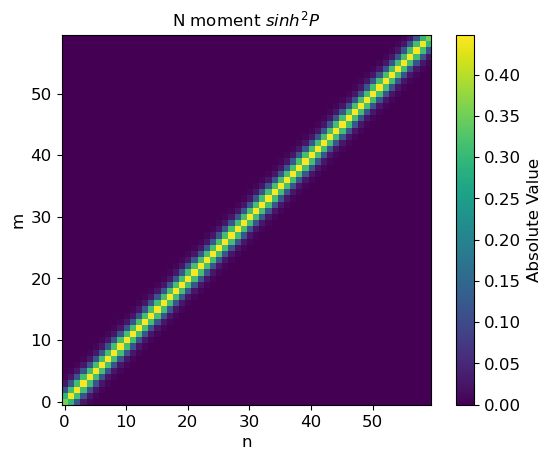

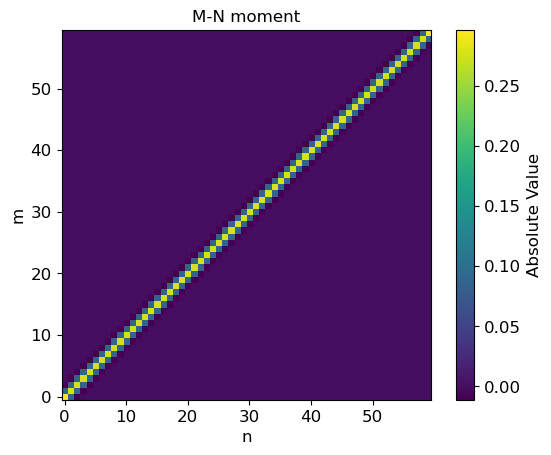

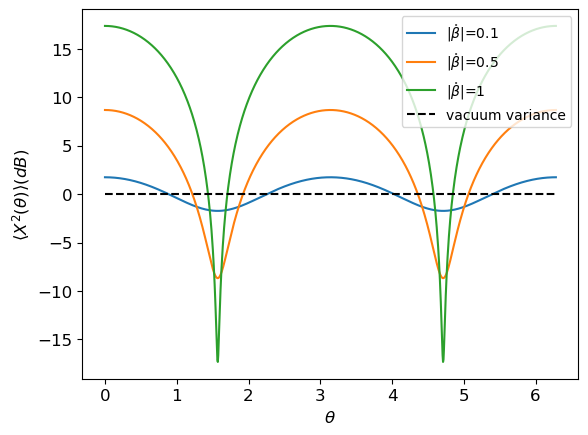

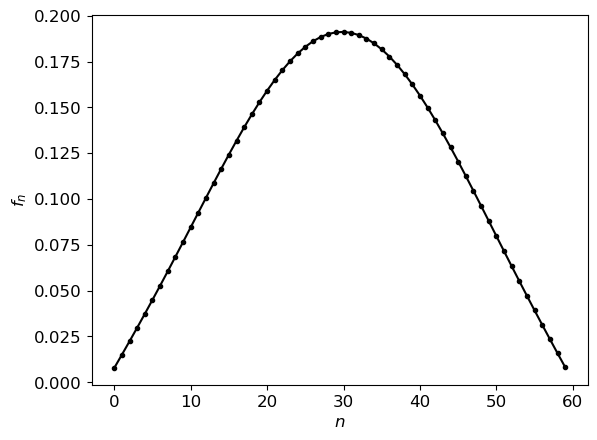

In [50]:
#diagionalizing N matrix to find f with most photons, this gives the most squeezing

#defining dg joint amplitude
Tc = 0.001
Tp = 1
Bc = 0.5
fine_param = 1
mat_size = 30 * fine_param

r = r_dg_f(mat_size,0,fine_param)

B = Bc * r
U, P = sc.linalg.polar(B, side = "right")
sinhP = sinh(P)
coshP = cosh(P)
sinh2P = np.linalg.matrix_power(sinhP,2)


plt.imshow(np.transpose(np.real(sinh2P)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"N moment $sinh^2P$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


evals, evecs = np.linalg.eig(sinh2P)

#print(evals)
#print(evecs)

eig_mat = np.linalg.multi_dot([evecs,np.diag(evals),evecs.conj().T])

#finds the index of the largest eigenvalue
max_index = np.argmax(evals)

#f is the first column based on inspection of eigenvalues
f=evecs[:,max_index]

#defining N and M moment matrices
N = sinh2P
M = np.linalg.multi_dot([coshP,sinhP,U.T])

plt.imshow(np.transpose(np.real(M-N)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"M-N moment")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()

    
theta_vals = np.linspace(0,2*np.pi,1000)
Bc_list=[0.1,0.5,1]
f_list=[]


for Bc in Bc_list:
    B = Bc * r
    U, P = sc.linalg.polar(B, side = "right")
    sinhP = sinh(P)
    coshP = cosh(P)
    sinh2P = np.linalg.matrix_power(sinhP,2)
    evals, evecs = np.linalg.eig(sinh2P)
    max_index = np.argmax(evals)
    f=evecs[:,max_index]
    f_list.append(f)
    N = sinh2P
    M = np.linalg.multi_dot([coshP,sinhP,U.T])
    Var_vals = []
    for theta in theta_vals:
        Var_vals.append(Var(theta))       
    plt.plot(theta_vals,10*np.log10(np.array(Var_vals)), label=r"$|\mathring{\beta}|$="+str(Bc))
    #print(Var(np.pi/2))
    
    K = Kmat(N,M)
    Kevals, Kevecs = np.linalg.eig(K)
    min_index = np.argmin(evals)
    opt_phi = Kevecs[:,min_index]
    #plt.hlines(10*np.log10(1+2*np.min(Kevals)), 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
        
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\langle X^2(\theta)\rangle (dB)$")
plt.hlines(0, 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
plt.legend(loc="upper right")
plt.show()


plt.plot(np.abs(f), marker=".", color="black")
plt.xlabel("$n$")
plt.ylabel("$f_n$")
plt.show()

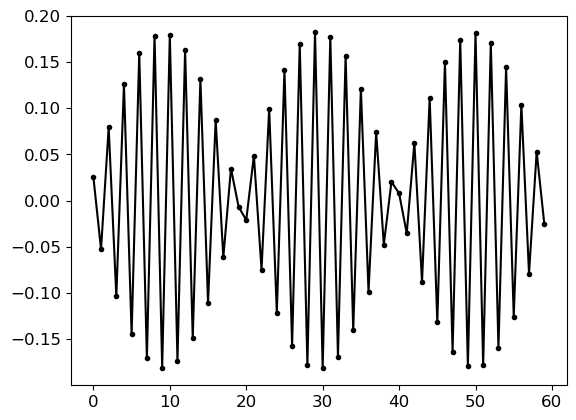

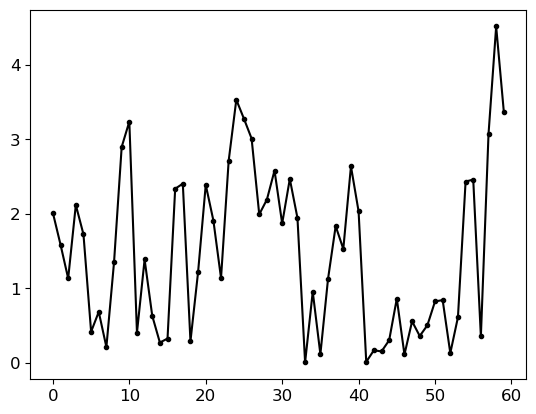

In [17]:
phi_R = opt_phi[:int(len(opt_phi)/2)]
phi_I = opt_phi[int(len(opt_phi)/2):]

phi_c = []
for i in range(int(len(opt_phi)/2)):
    phi_c.append(phi_R[i]+(0+1j)*phi_I[i])

plt.plot(np.real(phi_c), marker=".", color="black")
plt.show()

#adding up all f method eigenstates
f=np.zeros(len(evals))
for i in range(len(evals)):
    f += evecs[:,i] * np.sqrt(evals[i])
    
plt.plot(np.abs(f), marker=".", color="black")



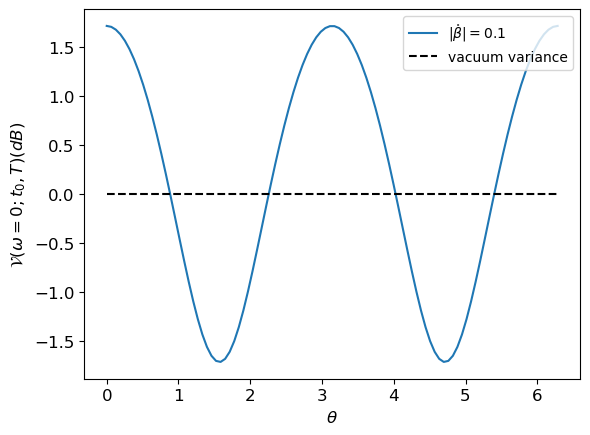

(0.6733259861851782+0j)


In [10]:
#plotting CW case with same Bc to compare

#defining dg joint amplitude
Tc=0.001
Tp=1
Bc = 0.1
fine_param = 1
mat_size = 30 * fine_param

r = r_dg_f(mat_size,0,fine_param)

w_val = 0
thetalist = np.linspace(0,2*np.pi,100)

B = Bc * r
U, Q = sc.linalg.polar(B, side = "left")
sinhQ = sinh(Q)
coshQ = cosh(Q)

Vlist = []
for theta in thetalist:
    Vlist.append(V(w_val,theta))
plt.plot(thetalist,10*np.log10(np.array(Vlist)/len(Q)), label=r"$|\mathring{\beta}|=$"+str(Bc))

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\mathcal{V}(\omega=0;t_0,T) (dB)$")
plt.hlines(0, 0, 2*np.pi, color="black", linestyle="dashed", label="vacuum variance")
plt.legend(loc="upper right")
plt.show()

print(min(Vlist)/len(Q))

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


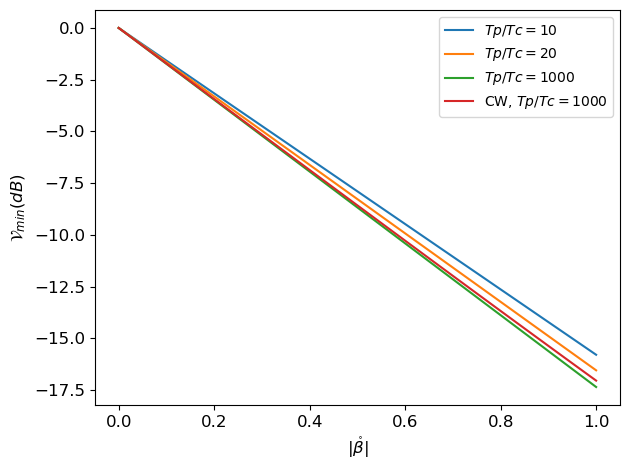

In [52]:
# comparing minimum variance between CW and pulsed vs beta_circ
Tp=1
Bc = 0.1
fine_param = 1
mat_size = 30 * fine_param


Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
Bc_vals = np.linspace(0,1,50)
Tc_vals = [0.1,0.05,0.001]
for TC in Tc_vals:
    Sq_Pulsed = []
    
    Tc = TC
    for Bc in Bc_vals:        
        r = r_dg_f(mat_size,0,fine_param)
        B = Bc * r   
        U, P = sc.linalg.polar(B, side = "right")
        sinhP = sinh(P)
        coshP = cosh(P)
        sinh2P = np.linalg.matrix_power(sinhP,2)
        evals, evecs = np.linalg.eig(sinh2P)
        max_index = np.argmax(evals)
        f = evecs[:,max_index]
        N = sinh2P
        M = np.linalg.multi_dot([coshP,sinhP,U.T])
        Sq_Pulsed.append(Var(np.pi/2))

    #plt.plot(Bc_vals,10*np.log10(np.array(Sq_CW)), label="CW")
    plt.plot(Bc_vals,10*np.log10(np.array(Sq_Pulsed)), label="$Tp/Tc=$"+str(int(1/Tc)))
 
Sq_CW = []
Tc=0.001
for Bc in Bc_vals:  
    r = r_dg_f(mat_size,0,fine_param)
    B = Bc * r   
    U, Q = sc.linalg.polar(B, side = "left")
    sinhQ = sinh(Q)
    coshQ = cosh(Q)
    Sq_CW.append(Sq(0))

    
plt.plot(Bc_vals,10*np.log10(np.array(Sq_CW)), label="CW, $Tp/Tc=$"+str(int(1/Tc)))
plt.ylabel(r"$\mathcal{V}_{min} (dB)$")
plt.xlabel(r"$|\mathring{\beta}|$")
plt.legend()
plt.tight_layout()
plt.savefig("Homo_Min.pdf")
plt.show()

/Users/jasperkranias/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


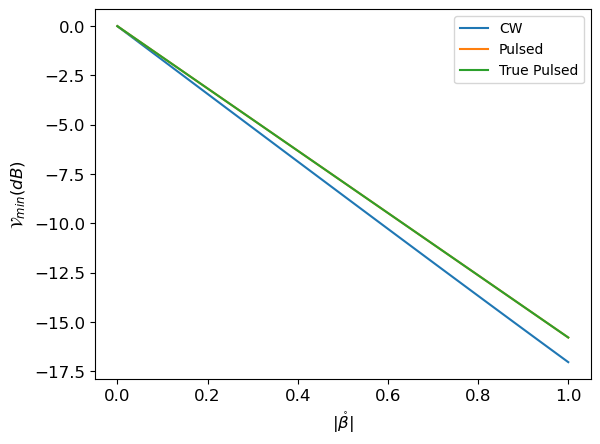

In [111]:
# comparing minimum variance between CW and pulsed vs beta_circ with the true minimum from diagonalization
Tp=1
Bc = 0.1
fine_param = 1
mat_size = 30 * fine_param


Omega = 2 * np.sqrt(np.pi) / (Tc * fine_param)
Bc_vals = np.linspace(0,1,50)
Sq_CW = []
Sq_Pulsed = []
Sq_K = []
for Bc in Bc_vals:
    
    Tc=0.001
    r = r_dg_f(mat_size,0,fine_param)
    B = Bc * r   
    U, Q = sc.linalg.polar(B, side = "left")
    sinhQ = sinh(Q)
    coshQ = cosh(Q)
    Sq_CW.append(Sq(0))
    
    Tc=0.1
    r = r_dg_f(mat_size,0,fine_param)
    B = Bc * r   
    U, P = sc.linalg.polar(B, side = "right")
    sinhP = sinh(P)
    coshP = cosh(P)
    sinh2P = np.linalg.matrix_power(sinhP,2)
    evals, evecs = np.linalg.eig(sinh2P)
    max_index = np.argmax(evals)
    f = evecs[:,max_index]
    N = sinh2P
    M = np.linalg.multi_dot([coshP,sinhP,U.T])
    Sq_Pulsed.append(Var(np.pi/2))
    
    
    #true pulsed minimum variance
    K = Kmat(N,M)
    Kevals, Kevecs = np.linalg.eig(K)
    Sq_K.append(1+2*np.min(Kevals))
    min_index = np.argmin(evals)
    opt_phi = Kevecs[:,min_index]
    #plt.plot(opt_phi)
    

#plt.plot(opt_phi)
#plt.show()    

plt.plot(Bc_vals,10*np.log10(np.array(Sq_CW)), label="CW")
plt.plot(Bc_vals,10*np.log10(np.array(Sq_Pulsed)), label="Pulsed")
plt.plot(Bc_vals,10*np.log10(np.array(Sq_K)), label="True Pulsed")
plt.ylabel(r"$\mathcal{V}_{min} (dB)$")
plt.xlabel(r"$|\mathring{\beta}|$")
plt.legend()
plt.savefig("Homo_Min.pdf")
plt.show()